## Unidad1. Mineria de textos

Texto no estructurado -> formato estructurado

- Datos estructurados
- Datos no estructurados
- Datos semiestructurados

Aplicaciones de la minería de texto 
- Servicio de atención al cliente
- Clasificación de sentimientos
- Gestión de riesgos
- Mantenimiento
- Asistencia sanitaria
- Filtrado de spam

## Unidad 2. Preprocesamiento de textos

Práctica de limpiar y transformar datos de texto en un formato utilizable

**Procesamiento del lenguaje natural (PLN)**

1. Recuperación de información (pln)
- Tokenización
- Palabras de parada
- Stemming | Lematización 

2. Procesamiento del lenguaje natural (PLN)
- Resumen
- Etiquetado de parte del discurso (PoS, por sus siglas en inglés)
- Categorización de texto (Análisis sintáctico)
- Análisis de sentimiento

3. Extracción de información
- Selección de características
- Extracción de características
- Reconocimiento de entidad nombrada (NER, por sus siglas en inglés)-REGEX

Analisis sintáctico:
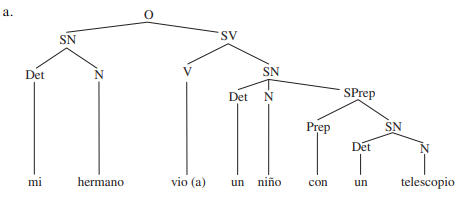

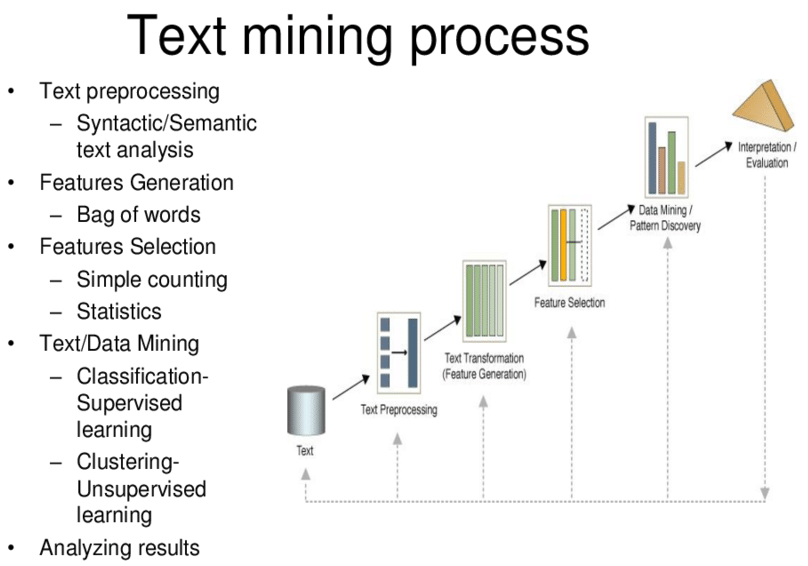

Cloud Words

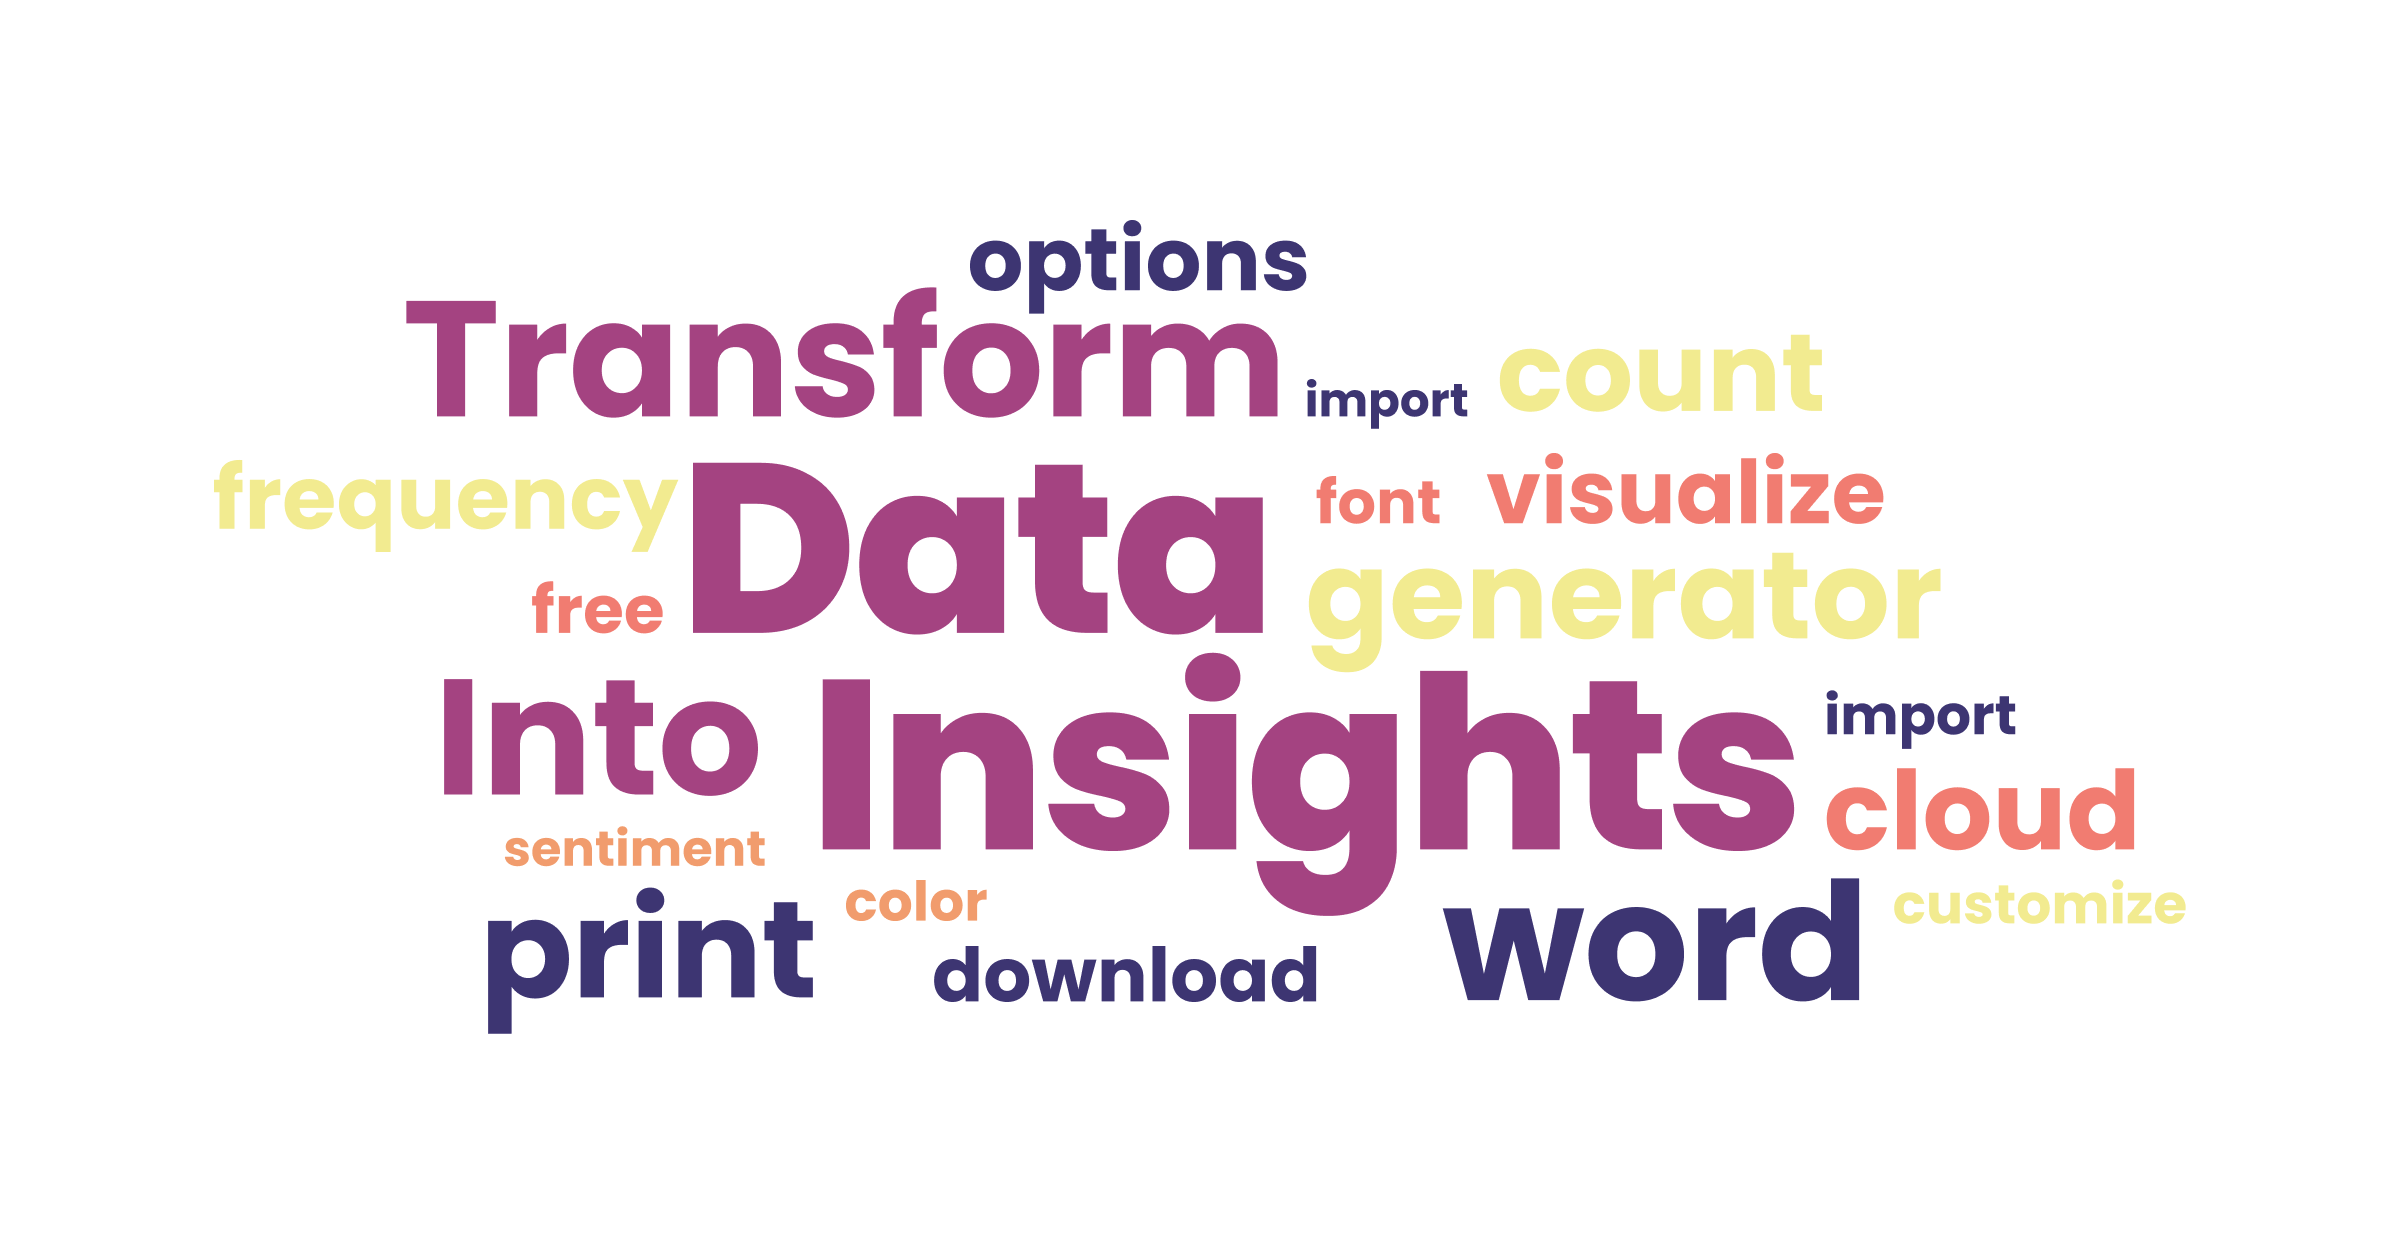

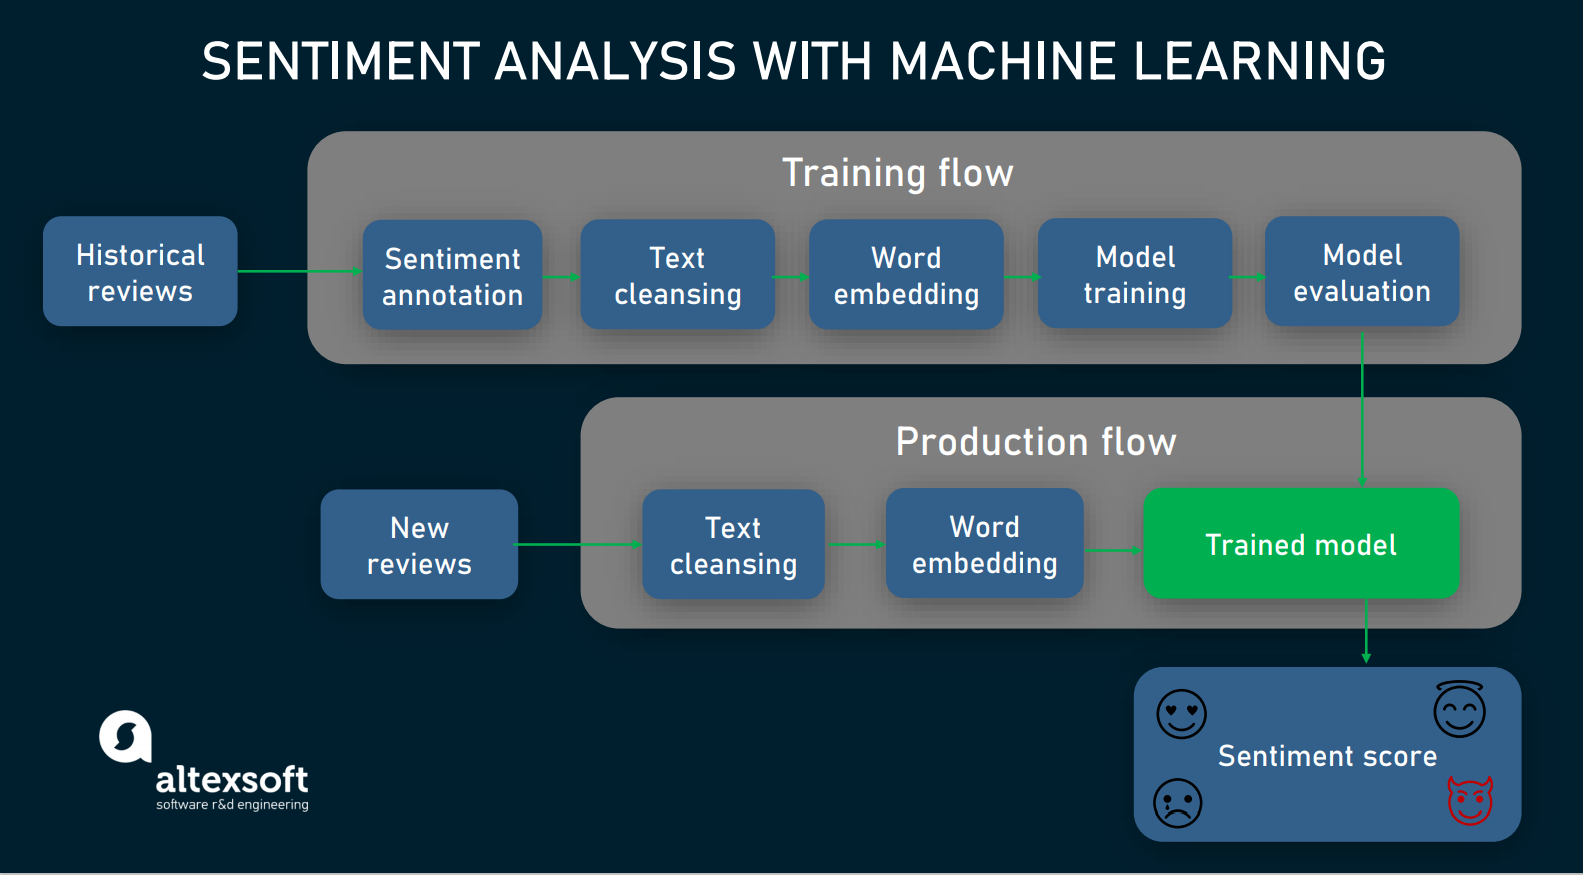

In [1]:
#!pip install scikit-learn
#!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import re
import nltk # https://www.nltk.org/
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('Tweets.csv')
print(len(df))
df.head()

14640


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [5]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [6]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
( df.isna().sum() * 100 / df.index.size).round(1)

tweet_id                         0.0
airline_sentiment                0.0
airline_sentiment_confidence     0.0
negativereason                  37.3
negativereason_confidence       28.1
airline                          0.0
airline_sentiment_gold          99.7
name                             0.0
negativereason_gold             99.8
retweet_count                    0.0
text                             0.0
tweet_coord                     93.0
tweet_created                    0.0
tweet_location                  32.3
user_timezone                   32.9
dtype: float64

In [9]:
df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64

0 Virgin America
1 United
2 Southwest
3 Delta
4 US Airways
5 American


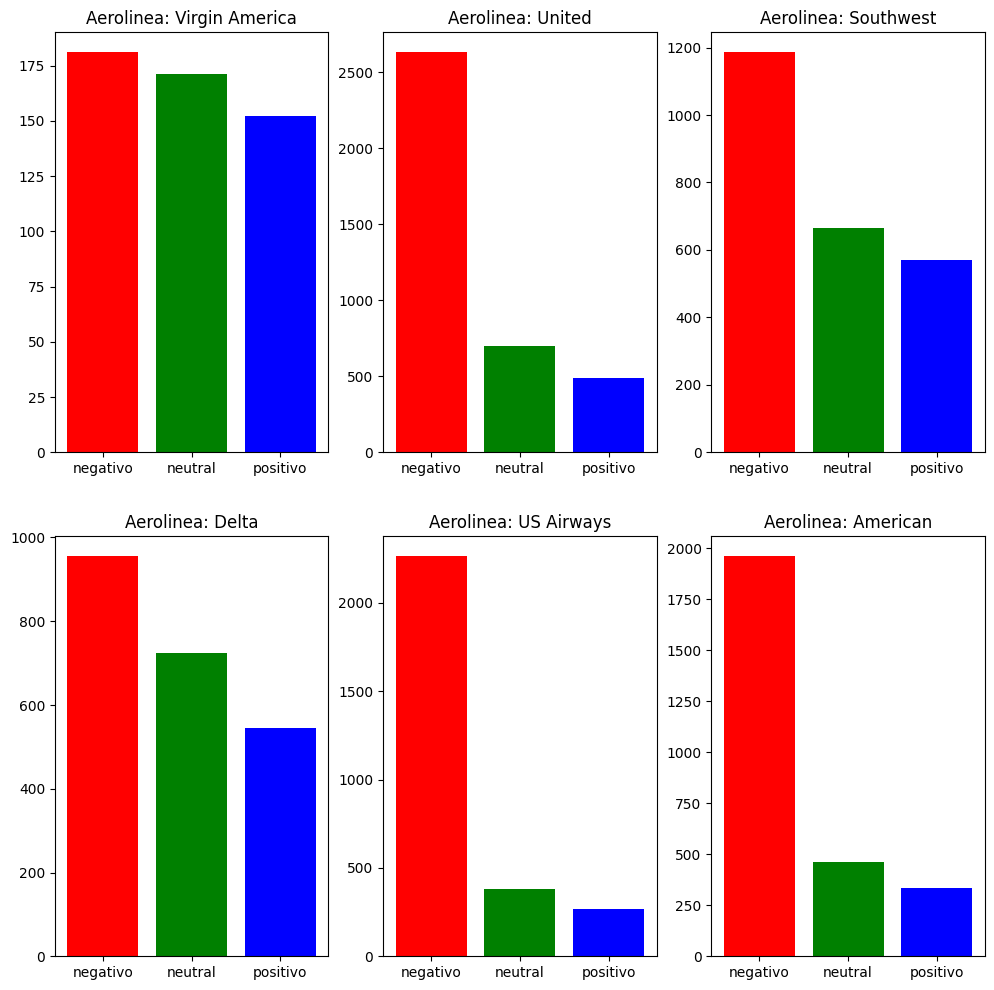

In [10]:
airlines = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
airlines = list( df.airline.unique() )

plt.figure(1, figsize=(12,12))

for i,airline in enumerate(airlines):
    print(i,airline)
    plt.subplot(2,3, i+1)
    
    new_df = df[df['airline']==airline]
    count = new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count, color = ['red', 'green', 'blue'])
    plt.xticks(Index, ['negativo', 'neutral', 'positivo'])
    plt.title('Aerolinea: ' + airline)

In [11]:
neg_df = df[df['airline_sentiment']=='negative']
neg_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN


In [12]:
neg_df['text']

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9178, dtype: object

In [13]:
neg_df['text'].loc[3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [14]:
words = ' '.join(neg_df['text'])
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [15]:
txt = 'I applied and it\'s been three weeks.      Called and emailed with no response.'
print(txt.split())
' '.join(txt.split())

['I', 'applied', 'and', "it's", 'been', 'three', 'weeks.', 'Called', 'and', 'emailed', 'with', 'no', 'response.']


"I applied and it's been three weeks. Called and emailed with no response."

In [16]:
clean_word = ' '.join([
    word for word in words.split()
      if 'http' not in word
        and not word.startswith('@')
        and word != 'RT'
])

In [17]:
clean_word

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [19]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
#nltk.download('stopwords')

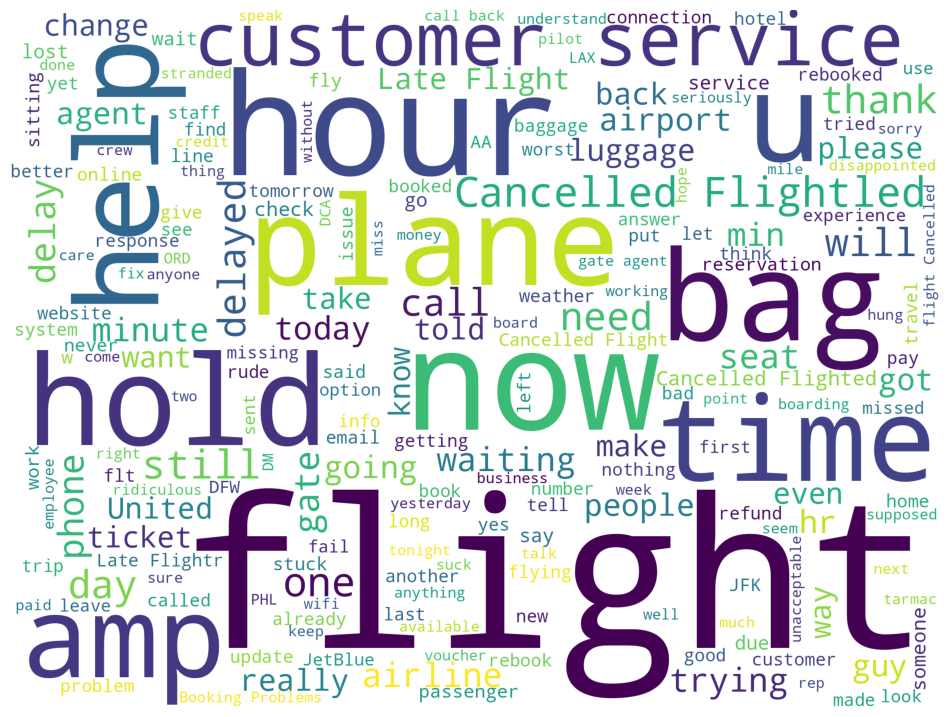

In [20]:
wcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=2000,
    height=1500,
    #max_words=90,
    ).generate(clean_word)

plt.figure(1, figsize=(12,12))
plt.imshow(wcloud)
plt.axis('off')
plt.show()

In [21]:
neg_df2 = df[df['airline_sentiment']=='positive']
words2 = ' '.join(neg_df2['text'])
clean_word2 = ' '.join([
    word for word in words2.split()
        if 'http' not in word
            and not word.startswith('@')
            and word != 'RT'
])

wcloud2 = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=3000,
    height=2500,
    #max_words=90,
    ).generate(clean_word2)

plt.figure(1, figsize=(12,12))
plt.imshow(wcloud2)
plt.axis('off')
plt.show()

In [22]:
df.negativereason

0                           NaN
1                           NaN
2                           NaN
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                       NaN
14636    Customer Service Issue
14637                       NaN
14638    Customer Service Issue
14639                       NaN
Name: negativereason, Length: 14640, dtype: object

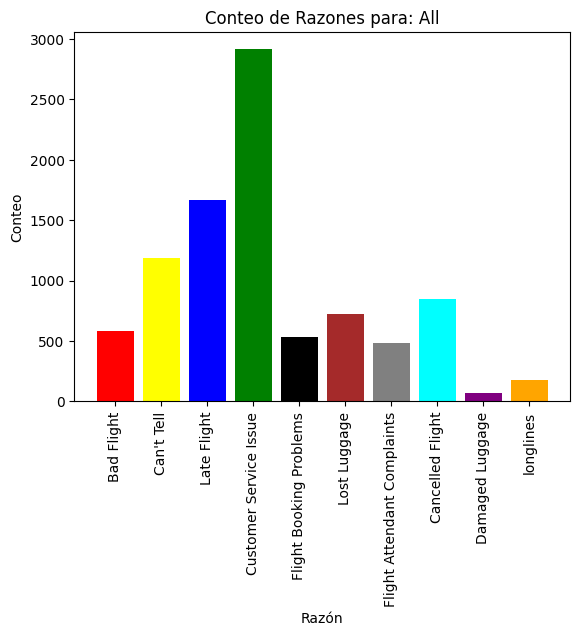

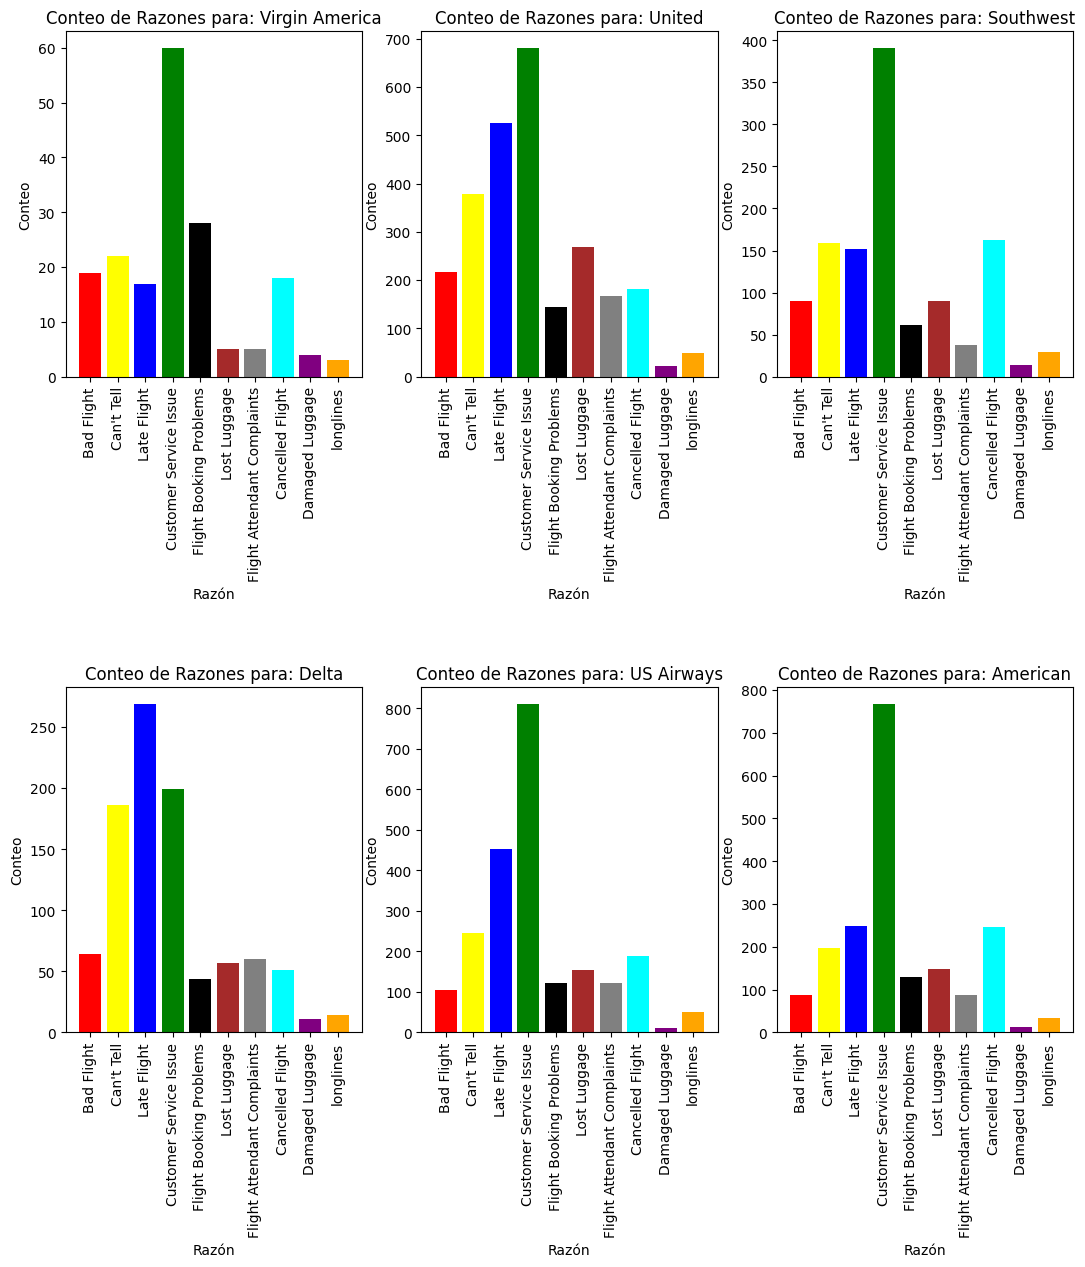

In [23]:
# Funciones de filtrar y obtener valores únicos

NR_Count=dict(df['negativereason'].value_counts(sort=False)) 

def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts()) 
    Unique_reason=list(df['negativereason'].unique()) 
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan'] 
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    a=NR_Count(Airline)
    count = a['count']
    Index = range (1, (len(a)+1))
    plt.bar (Index, count, color=['red', 'yellow', 'blue', 'green', 'black', 'brown', 'gray', 'cyan', 'purple', 'orange'])
    plt.xticks(Index, a['Reasons'], rotation=90)
    plt.ylabel('Conteo')
    plt.xlabel('Razón')
    plt.title('Conteo de Razones para: '+Airline)
    
plot_reason('All')
plt.figure(2, figsize=(13, 13))
for i in airlines:
    indices = airlines.index(i)
    plt.subplot(2,3, indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason (i)

In [24]:
date = df.reset_index()
date.tweet_created = pd.to_datetime(date.tweet_created)
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

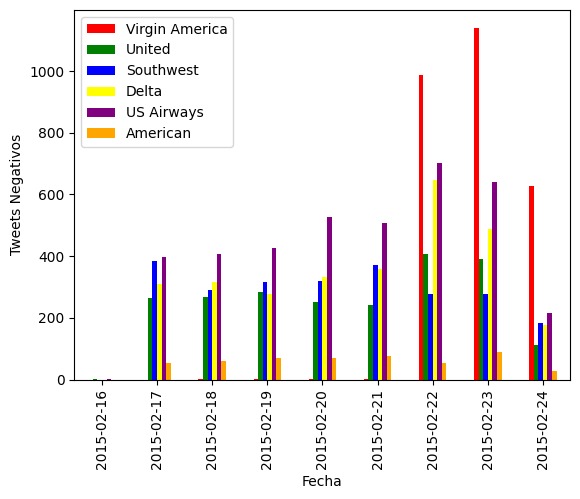

In [25]:
day_df2 = day_df.loc(axis=0)[:,:,'negative']
day_df2

ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color = ['red','green','blue','yellow','purple','orange'])
ax2.legend(labels = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American'])
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Tweets Negativos')
plt.show()

In [26]:
df['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [27]:
def tweet_to_words(tweet):
    letters_only= re.sub(r"[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = stopwords.words("english")
    
    meaningful_words = [w for w in words if not w in stops] 
    return(" ".join( meaningful_words ))

df['clean_tweet'] = df['text'].apply(lambda x: tweet_to_words(x))
df[['clean_tweet']]

,clean_tweet
0,virginamerica dhepburn said
1,virginamerica plus added commercials experienc...
2,virginamerica today must mean need take anothe...
3,virginamerica really aggressive blast obnoxiou...
4,virginamerica really big bad thing
...,...
14635,americanair thank got different flight chicago
14636,americanair leaving minutes late flight warnin...
14637,americanair please bring american airlines bla...
14638,americanair money change flight answer phones ...


In [ ]:
stopwords.words("english")

In [29]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [30]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']: 
    test_clean_tweet.append(tweet)

In [31]:
from sklearn.feature_extraction. text import CountVectorizer
v = CountVectorizer(analyzer = "word") # bolsa de palabras
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [32]:
## Prueba

# from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer (analyzer = "word")
# ## print(train_clean_tweet)
# ##train_features= v.fit_transform (train_clean_tweet)

# lst1 = ['Hola Hola soy Maria']
# train_features= v.fit_transform (lst1)
# print(train_features)

In [33]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifieris 0.6936475409836066
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80      1840
     neutral       0.47      0.42      0.45       642
    positive       0.59      0.60      0.59       446

    accuracy                           0.69      2928
   macro avg       0.61      0.61      0.61      2928
weighted avg       0.69      0.69      0.69      2928



<Figure size 640x480 with 0 Axes>

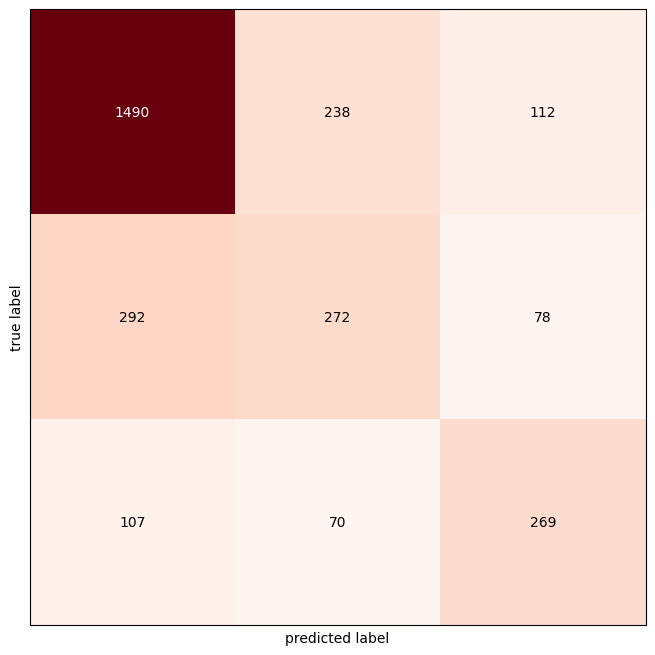

Accuracy of RandomForestClassifieris 0.7728825136612022
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2101
     neutral       0.46      0.59      0.52       454
    positive       0.60      0.73      0.66       373

    accuracy                           0.77      2928
   macro avg       0.66      0.71      0.68      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 640x480 with 0 Axes>

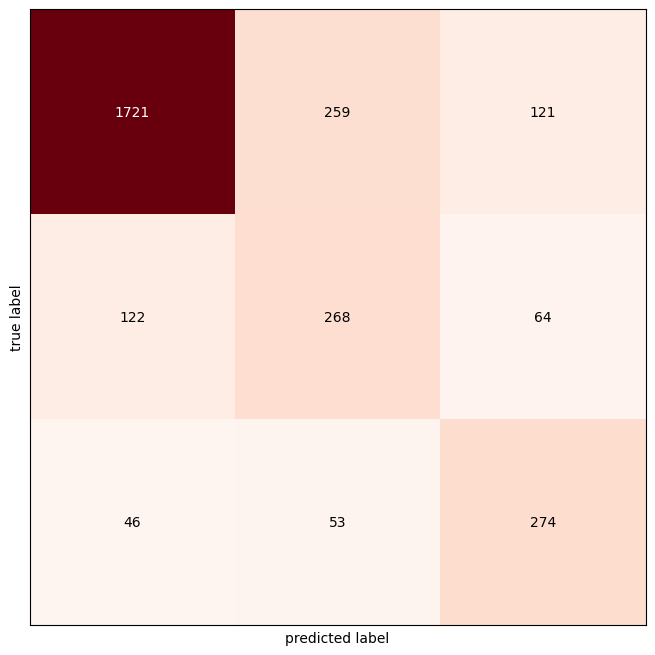

In [34]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()
Accuracy=[]
Model=[]

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit= classifier.fit(dense_features, train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred, test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print (classification_report (pred, test['airline_sentiment']))
    cm=confusion_matrix (pred, test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
    # plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
    # plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()